# CNN   -- convolutional neural network


## IMAGE CLASSIFICATION


In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot



In [2]:

from keras.datasets import mnist


In [3]:

# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()

In [4]:

# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))



Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [7]:
#first image resolution

trainX[0].shape

(28, 28)

In [6]:
#first Image pixels

trainX[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

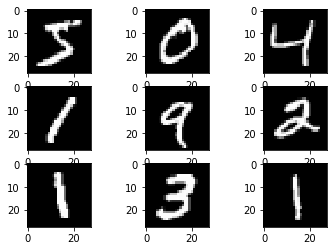

In [9]:

# plot first few images

for i in range(9):
    # define subplot
    pyplot.subplot(331 + i)
    
    # plot raw pixel data
    
    ##also try opencv - cv2
    pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))

    
    
# show figure/plots
pyplot.show()




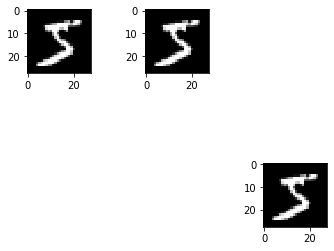

In [8]:

pyplot.subplot(331)
pyplot.imshow(trainX[0], cmap=pyplot.get_cmap('gray'))

pyplot.subplot(332)
pyplot.imshow(trainX[0], cmap=pyplot.get_cmap('gray'))


pyplot.subplot(339)
pyplot.imshow(trainX[0], cmap=pyplot.get_cmap('gray'))


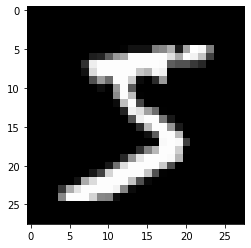

In [40]:
pyplot.imshow(trainX[0], cmap=pyplot.get_cmap('gray'))


# KERAS/TF MODELLING



In [10]:


from numpy import mean
from numpy import std
from matplotlib import pyplot

#from sklearn.model_selection import KFold

In [11]:


from keras.datasets import mnist

from keras.utils import to_categorical

from keras.models import Sequential

from keras.layers import Conv2D
from keras.layers import MaxPooling2D

from keras.layers import Flatten
from keras.layers import BatchNormalization

from keras.layers import Dense

#ADAM as well
from keras.optimizers import SGD



In [12]:

    (trainX, trainY), (testX, testY) = mnist.load_data()
    
    # reshape dataset to have a single channel
    
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    
    testX = testX.reshape((testX.shape[0], 28, 28, 1))
    
    
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)

    



In [13]:

    
    # convert from integers to floats
    train_norm = trainX.astype('float32')
    test_norm = testX.astype('float32')
    
    # normalize to range 0-1
   # ------>  x-min/max
    #------>  x- mean/sd
    
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    
    
 

In [16]:
train_norm[0]



array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [19]:

# define CNN model
def define_model():
    model = Sequential()
    
    #conv layer with 32 filters of 3*3 
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    
    #optional
    model.add(BatchNormalization())
    
    
    model.add(MaxPooling2D((2, 2))) # we can pass stride as well--overlapping vs non-overlapping
    
    #mandatory
    model.add(Flatten())
    
    #3D to 1D
    model.add(Dense(80, activation='relu', kernel_initializer='he_uniform'))
    
    
    model.add(BatchNormalization())
    
    ###  10 because numbers to classify are from 0 to 9
    
    model.add(Dense(10, activation='softmax'))
    
    
    # compile model
    #TRY ADAM as well -- rahul
    opt = SGD(lr=0.01, momentum=0.9)
    
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model



In [20]:
mdl = define_model()


mdl.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 80)                432720    
_________________________________________________________________
batch_normalization_1 (Batch (None, 80)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                8

In [21]:
mdl.fit(train_norm, trainY, epochs=10, batch_size=32, verbose=1)
    
    

Epoch 1/10
1875/1875 [==============================] - 76s 41ms/step - loss: 0.1279 - accuracy: 0.9621
Epoch 2/10
1875/1875 [==============================] - 77s 41ms/step - loss: 0.0504 - accuracy: 0.9846
Epoch 3/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0301 - accuracy: 0.9908
Epoch 4/10
1875/1875 [==============================] - 77s 41ms/step - loss: 0.0207 - accuracy: 0.9936
Epoch 5/10
1875/1875 [==============================] - 77s 41ms/step - loss: 0.0150 - accuracy: 0.9955
Epoch 6/10
1875/1875 [==============================] - 84s 45ms/step - loss: 0.0102 - accuracy: 0.9970
Epoch 7/10
1875/1875 [==============================] - 82s 44ms/step - loss: 0.0080 - accuracy: 0.9979
Epoch 8/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0063 - accuracy: 0.99830s - loss: 0.0063 
Epoch 9/10
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0050 - accuracy: 0.9987
Epoch 10/10
1875/1875 [=======================

In [31]:
loss, acc = mdl.evaluate(test_norm, testY, verbose=1)




313/313 [==============================] - 2s 7ms/step - loss: 0.0537 - accuracy: 0.9864


In [33]:
print('Train Loss is: %.3f' % (loss))

print('Train Accuracy is: %.3f' % (acc * 100.0))



Train Loss is: 0.054
Train Accuracy is: 98.640



# ALL 3 ISSUES, faced during this notebook


###    ValueError: Input 0 of layer
###       sequential_9 is incompatible with the layer: : 
#expected min_ndim=4, found ndim=3. Full shape received: [32, 28, 28]
    
==================================================================================================================      
    
### ValueError: Creating variables on a non-first call to a function decorated with tf.function.


     
====================================================================================================================  

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\eager\def_function.py in _call(self, *args, **kwds)
    805       # In this case we have created variables on the first call, so we run the
    806       # defunned version which is guaranteed to never create variables.
--> 807       return self._stateless_fn(*args, **kwds)  # pylint: disable=not-callable
    808     elif self._stateful_fn is not None:
    809       # Release the lock early so that multiple threads can perform the call

### TypeError: 'NoneType' object is not callable


=====================================================================================================================

# Prediction


In [45]:
pred_prob = mdl.predict(test_norm, verbose=1)
    
pred_prob

313/313 [==============================] - ETA:  - 2s 7ms/step


array([[9.7616869e-08, 1.7448695e-06, 1.6109789e-06, ..., 9.9998879e-01,
        9.7441211e-09, 2.7763863e-07],
       [1.1914124e-06, 3.2896485e-06, 9.9993634e-01, ..., 1.0535234e-08,
        2.0793516e-09, 3.1279010e-09],
       [6.0474285e-08, 9.9994886e-01, 3.6416099e-05, ..., 1.4187781e-05,
        7.4976050e-08, 3.4648444e-09],
       ...,
       [5.8994633e-13, 4.8356181e-09, 3.0260306e-12, ..., 3.2162266e-08,
        1.9334486e-08, 5.4115745e-10],
       [1.5867407e-07, 5.0160770e-10, 4.9177369e-09, ..., 4.6768116e-07,
        4.4649144e-04, 2.0958975e-08],
       [1.3033761e-07, 6.1053002e-10, 1.5958993e-05, ..., 3.6777017e-08,
        4.2179778e-08, 7.3077006e-10]], dtype=float32)

In [41]:
mdl.predict_classes(test_norm, verbose=1)
    
    

313/313 [==============================] - 2s 6ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [54]:
pred = np.argmax(pred_prob, axis=-1)

pred


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

# EVALUATION

In [60]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score



In [56]:
confusion_matrix(pred,testy)


array([[ 973,    0,    0,    0,    0,    2,    8,    0,    2,    2],
       [   0, 1124,    3,    0,    0,    0,    1,    5,    0,    1],
       [   3,    1, 1021,    1,    0,    1,    0,    8,    3,    1],
       [   0,    4,    1, 1003,    0,   10,    1,    2,    1,    3],
       [   0,    0,    0,    0,  970,    0,    1,    1,    1,    4],
       [   0,    0,    0,    3,    0,  873,    3,    0,    0,    5],
       [   2,    4,    2,    0,    3,    2,  942,    0,    1,    0],
       [   1,    1,    3,    1,    0,    0,    0, 1009,    1,    4],
       [   1,    1,    2,    2,    1,    4,    2,    0,  964,    4],
       [   0,    0,    0,    0,    8,    0,    0,    3,    1,  985]],
      dtype=int64)

In [58]:
print(classification_report(pred,testy)

     )

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       987
           1       0.99      0.99      0.99      1134
           2       0.99      0.98      0.99      1039
           3       0.99      0.98      0.99      1025
           4       0.99      0.99      0.99       977
           5       0.98      0.99      0.98       884
           6       0.98      0.99      0.98       956
           7       0.98      0.99      0.99      1020
           8       0.99      0.98      0.99       981
           9       0.98      0.99      0.98       997

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [70]:
print("Test accuracy: '%.3f' This seems good fit" % accuracy_score(pred,testy))




Test accuracy: '0.986' This seems good fit
